In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.stats import special_ortho_group
import seaborn as sns
import pandas as pd

# Create spiral

In [5]:
N = 200
theta = np.linspace(0,4*np.pi,N)
r = np.linspace(0,10,N)
x = r*np.cos(theta)
y = r*np.sin(theta)
spiral = np.hstack((np.expand_dims(x,1),np.expand_dims(y,1)))

In [6]:
spiral.shape

(200, 2)

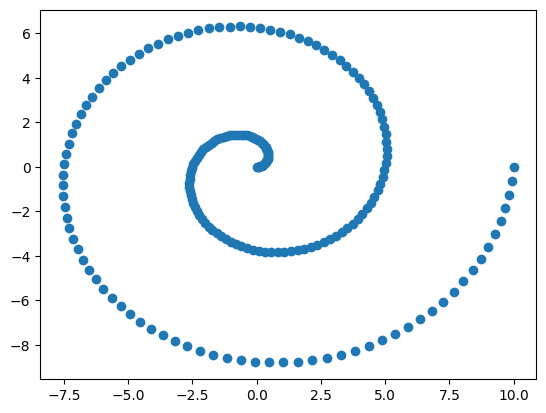

In [7]:
plt.scatter(spiral[:,0], spiral[:,1])

# Expand + Rotate

In [8]:
def expand_coord(data: np.ndarray, target_dim: int):
    assert data.shape[1] < target_dim
    expanded = np.zeros((data.shape[0], target_dim))
    expanded[:,:data.shape[1]] = data
    return expanded

In [9]:
expanded_spiral_10d = expand_coord(spiral, 10)
random_rotation_matrix_10d = special_ortho_group.rvs(10)
random_rotated_spiral_10d = np.matmul(expanded_spiral_10d, random_rotation_matrix_10d)

In [10]:
random_rotated_spiral_10d.shape

(200, 10)

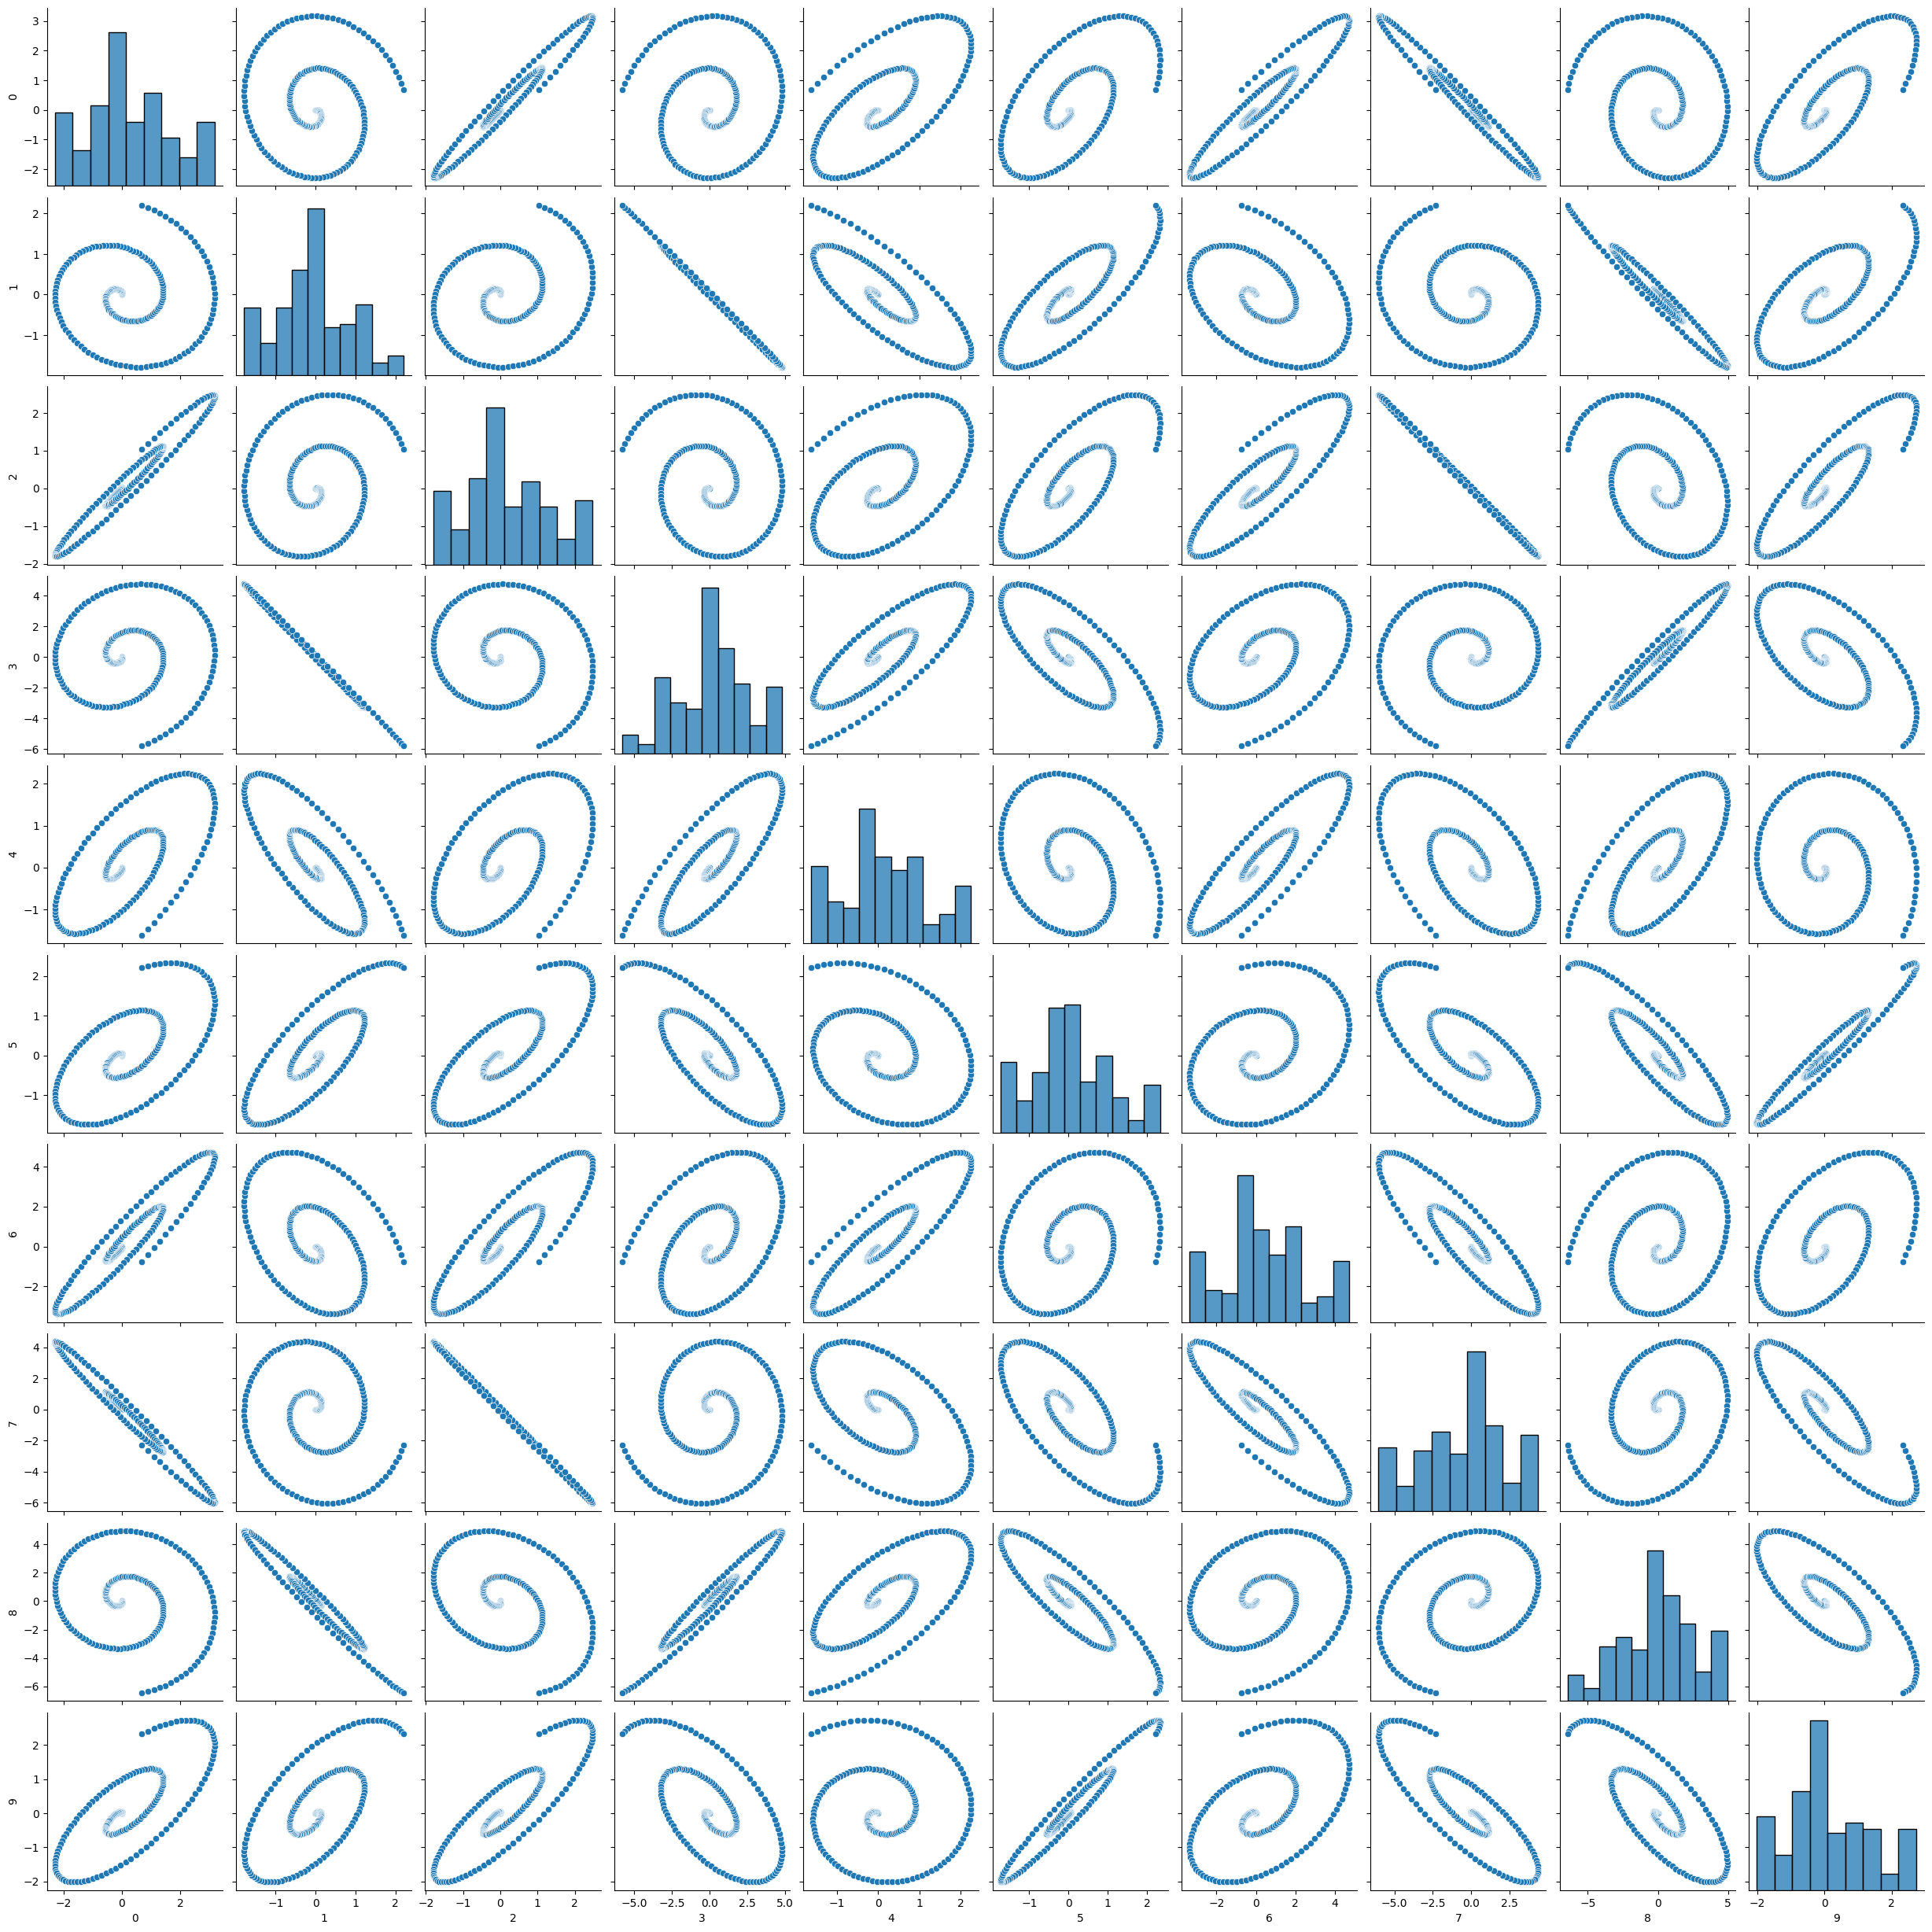

In [11]:
sns.pairplot(pd.DataFrame(random_rotated_spiral_10d))

# Sanity check high-dimensional rotation

In [12]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
recovered_2d = pca.fit_transform(random_rotated_spiral_10d)

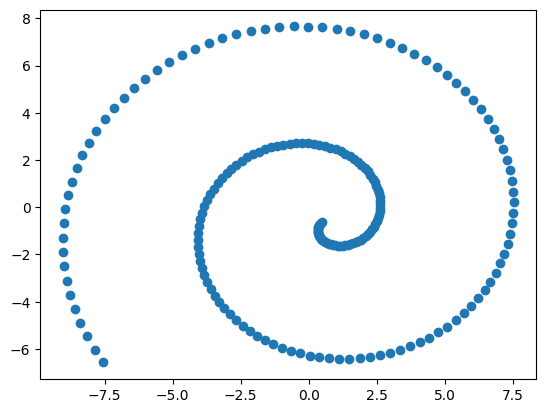

In [13]:
plt.scatter(recovered_2d[:,0], recovered_2d[:,1])